# Principles of Data Science Coursework - Retail Olist

## Imports

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

from urllib.request import urlopen
#from mpl_toolkits_axes_grid1 import make_axes_locatable
#import googletrans
import pandas_profiling as pp

## Data Loading and Cleaning

In [ ]:
customers_df = pd.read_csv(r"/olist_customers_dataset.csv")
geolocation_df = pd.read_csv(r"/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv(r"/olist_order_items_dataset.csv")
payments_df = pd.read_csv(r"/olist_order_payments_dataset.csv")
reviews_df = pd.read_csv(r"/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv(r"/olist_orders_dataset.csv")
products_df = pd.read_csv(r"/olist_products_dataset.csv")
sellers_df = pd.read_csv(r"/olist_sellers_dataset.csv")
product_category_df = pd.read_csv(r"/product_category_name_translation.csv")

In [ ]:
customers_df["customer_zip_code_prefix"].astype(np.uint8)
geolocation_df["geolocation_zip_code_prefix"].astype(np.uint8)
sellers_df["seller_zip_code_prefix"].astype(np.uint8)

0       223
1        20
2        63
3        99
4       114
       ... 
3090     71
3091     73
3092     42
3093     80
3094     19
Name: seller_zip_code_prefix, Length: 3095, dtype: uint8

In [ ]:
df = products_df.merge(product_category_df, on = "product_category_name")\
                .merge(order_items_df, on = "product_id")\
                .merge(sellers_df, on = "seller_id")\
                .merge(orders_df, on = "order_id")\
                .merge(customers_df, on = "customer_id")\
                .merge(reviews_df, on = "order_id")\
                .merge(payments_df, on = "order_id")         

In [ ]:
df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,1,debit_card,1,18.30
1,a035b83b3628decee6e3823924e0c10f,perfumaria,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,perfumery,...,0f0f85749cb82321d902e390a9c33694,4,NaN,NaN,2018-07-11 00:00:00,2018-07-15 21:32:04,1,credit_card,10,289.45
2,091107484dd7172f5dcfed173e4a960e,perfumaria,50.0,260.0,2.0,183.0,16.0,8.0,13.0,perfumery,...,39489f8518181b82cb86ce264e1ccc55,5,Agora sim,Recebido o pedido finalmente produto ótimo,2018-04-26 00:00:00,2018-04-30 21:15:06,1,credit_card,2,57.75
3,e8b61f78db501ea0ca45677d1ca27de2,brinquedos,49.0,120.0,1.0,400.0,50.0,10.0,25.0,toys,...,39489f8518181b82cb86ce264e1ccc55,5,Agora sim,Recebido o pedido finalmente produto ótimo,2018-04-26 00:00:00,2018-04-30 21:15:06,1,credit_card,2,57.75
4,ccac9976bafbf7e587bd2c29302e2314,perfumaria,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,perfumery,...,36b616f738d1f617cc12aeb2c01705f3,3,NaN,NaN,2018-08-07 00:00:00,2018-08-07 22:56:38,1,credit_card,8,286.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,e0714d4d2e52b1fbc8e851dac210333a,flores,56.0,1650.0,3.0,550.0,16.0,25.0,16.0,flowers,...,8d1145a143835cf50010806970d5a9c2,5,NaN,NaN,2018-08-01 00:00:00,2018-08-01 21:46:22,1,boleto,1,47.14
115605,eaa3fffe22b0b5efe02db64ab9d3bf84,moveis_colchao_e_estofado,30.0,2073.0,4.0,1850.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,...,11912dbae5f169782098a20fc51c0b33,1,NaN,Comprei o produto e quando chegou veio na cor ...,2018-02-06 00:00:00,2018-03-05 15:21:00,1,credit_card,3,266.18
115606,c3d08bab8c7c6d9cc1f6cfb5a465c80b,moveis_colchao_e_estofado,32.0,2073.0,4.0,1950.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,...,22fe5d28fc369be163eaa6fefaa1569b,1,NaN,Muito insatisfeita com minhas ultimas compras ...,2018-01-07 00:00:00,2018-01-09 14:18:31,1,credit_card,2,288.29
115607,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,...,da40dfc77067cb3ca317ee3d9f628b13,5,NaN,"Obrigada, vcs são 10!",2017-12-13 00:00:00,2017-12-14 11:32:20,2,credit_card,5,129.16


In [ ]:
df.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length', 'order_item_id': 'Quantity'}, inplace=True)

In [ ]:
df['Price x Quantity'] = df.price * df.Quantity
df['total_freight_value'] = df['freight_value'] * df['Quantity']
df['profits'] = df['Price x Quantity'] - df['total_freight_value']

In [ ]:
dates = df[['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
         'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp']]
for col in dates:
    dates[col] = pd.to_datetime(dates[col], errors = 'raise')
    

<ipython-input-8-4e38d4955883>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates[col] = pd.to_datetime(dates[col], errors = 'raise')


In [ ]:
dates.info()

df.drop(columns = ['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
         'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp'], inplace = True)
df = df.join(dates)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   shipping_limit_date            115609 non-null  datetime64[ns]
 1   order_purchase_timestamp       115609 non-null  datetime64[ns]
 2   order_approved_at              115595 non-null  datetime64[ns]
 3   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 4   order_delivered_customer_date  113209 non-null  datetime64[ns]
 5   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 6   review_creation_date           115609 non-null  datetime64[ns]
 7   review_answer_timestamp        115609 non-null  datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 7.9 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     115609 non-null  object        
 1   product_category_name          115609 non-null  object        
 2   product_name_length            115609 non-null  float64       
 3   product_description_length     115609 non-null  float64       
 4   product_photos_qty             115609 non-null  float64       
 5   product_weight_g               115608 non-null  float64       
 6   product_length_cm              115608 non-null  float64       
 7   product_height_cm              115608 non-null  float64       
 8   product_width_cm               115608 non-null  float64       
 9   product_category_name_english  115609 non-null  object        
 10  order_id                       115609 non-null  object        
 11  

### Data Wrangling

In [ ]:
def missing_value_check(df):
    missing_values = df.isnull().sum()
    percentage_missing = 100*(missing_values/ len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Missing Values": missing_values,
                         "Percentage Missing": percentage_missing,
                         "Data Type": data_type,
                         "Number of Unique Values" : data_type})

In [ ]:
missing_value_check(df)

,Missing Values,Percentage Missing,Data Type,Number of Unique Values
product_id,0,0.000000,object,object
product_category_name,0,0.000000,object,object
product_name_length,0,0.000000,float64,float64
product_description_length,0,0.000000,float64,float64
product_photos_qty,0,0.000000,float64,float64
product_weight_g,1,0.000865,float64,float64
product_length_cm,1,0.000865,float64,float64
product_height_cm,1,0.000865,float64,float64
product_width_cm,1,0.000865,float64,float64
product_category_name_english,0,0.000000,object,object


In [ ]:
def duplicate_check(df):
    duplicate = df.duplicated().sum()
    percentage_duplicated = 100 * (duplicate/len(df))
    data_type = df.dtypes
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Percentage Duplicated": percentage_duplicated,
                         "Data Type": data_type})

In [ ]:
duplicate_check(df)

,Duplicated Values,Percentage Duplicated,Data Type
product_id,0,0.0,object
product_category_name,0,0.0,object
product_name_length,0,0.0,float64
product_description_length,0,0.0,float64
product_photos_qty,0,0.0,float64
product_weight_g,0,0.0,float64
product_length_cm,0,0.0,float64
product_height_cm,0,0.0,float64
product_width_cm,0,0.0,float64
product_category_name_english,0,0.0,object


There are no duplicate values.

We drop reveiw comment titles, and review comment messages since it has a higher percentage than 30 within the dataframe. 

For order_delivered_carrier_date and order_delivered_customer_date, and order_approced_at, we remove the rows containing these null values when using this data to answer research questions. We will not remove these null values from the master dataframe.

Lastly, for the product_weight, product_height and product_length and product_width, we will also drop this row containing the null values.

In [ ]:
geolocation_df.rename(columns = {'geolocation_lat' : 'lat',
                                 'geolocation_lng' : 'lng',
                                 'geolocation_city' : 'city',
                                 'geolocation_state' : 'state'}, inplace = True)

In [ ]:
geolocation_df

,geolocation_zip_code_prefix,lat,lng,city,state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### Loading Geospatial Data

In [ ]:
geolocation_df

,geolocation_zip_code_prefix,lat,lng,city,state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


## Data Analysis

### Analysis Question 1 : Top 10 Sellers, Top 10 Customers, Top 10 Products

In [ ]:
q1_df = df[["seller_id", "price", "order_id", "Quantity", "product_id", "freight_value", "seller_city", "seller_state", "Price x Quantity"]]

In [ ]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   seller_id         115609 non-null  object 
 1   price             115609 non-null  float64
 2   order_id          115609 non-null  object 
 3   Quantity          115609 non-null  int64  
 4   product_id        115609 non-null  object 
 5   freight_value     115609 non-null  float64
 6   seller_city       115609 non-null  object 
 7   seller_state      115609 non-null  object 
 8   Price x Quantity  115609 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 12.9+ MB


In [ ]:
q1_df

,seller_id,price,order_id,Quantity,product_id,freight_value,seller_city,seller_state,Price x Quantity
0,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,e17e4f88e31525f7deef66779844ddce,1,1e9e8ef04dbcff4541ed26657ea517e5,7.39,sao paulo,SP,10.91
1,5670f4db5b62c43d542e1b2d56b0cf7c,268.38,b18cb761efbe70da4838435a349abd07,1,a035b83b3628decee6e3823924e0c10f,21.07,sao paulo,SP,268.38
2,5670f4db5b62c43d542e1b2d56b0cf7c,7.65,a7708ffa8966514c098d15e1abfa6417,1,091107484dd7172f5dcfed173e4a960e,10.55,sao paulo,SP,7.65
3,3d871de0142ce09b7081e2b9d1733cb1,29.00,a7708ffa8966514c098d15e1abfa6417,2,e8b61f78db501ea0ca45677d1ca27de2,10.55,campo limpo paulista,SP,58.00
4,5670f4db5b62c43d542e1b2d56b0cf7c,268.38,206d1a13596872a713dba14504fdf699,1,ccac9976bafbf7e587bd2c29302e2314,18.07,sao paulo,SP,268.38
...,...,...,...,...,...,...,...,...,...
115604,d7f1cfc638473be93baedbfd02208016,30.00,df832acdcfc236969ab361d4597e6e0a,1,e0714d4d2e52b1fbc8e851dac210333a,17.14,belford roxo,RJ,30.00
115605,191d55f7edb8524d525ed01b20fe32e8,249.00,440fd902b617080eeb9463a65ffae07a,1,eaa3fffe22b0b5efe02db64ab9d3bf84,17.18,brasilia,DF,249.00
115606,191d55f7edb8524d525ed01b20fe32e8,249.00,9edafa4c6dbc4a9dd05637c84bf96605,1,c3d08bab8c7c6d9cc1f6cfb5a465c80b,39.29,brasilia,DF,249.00
115607,191d55f7edb8524d525ed01b20fe32e8,249.00,37a7476e58da10721b5e55ba4be6807d,1,dc36a7859b743d8610a2bbbaea26ece9,9.33,brasilia,DF,249.00


In [ ]:
#q1_df.nlargest(10, 'Price x Quantity')

In [ ]:
#sellers = q1_df.groupby('seller_id').agg(['unique'], axis='columns')
#sellers1 = q1_df.drop(columns = ["order_id", "product_id", "seller_state", "seller_zip_code_prefix", "seller_city"], inplace = True)
sellers1 = q1_df.groupby('seller_id').nunique().reset_index()

In [ ]:
sellers1.dtypes

seller_id           object
price                int64
order_id             int64
Quantity             int64
product_id           int64
freight_value        int64
seller_city          int64
seller_state         int64
Price x Quantity     int64
dtype: object

In [ ]:
sellers1.sort_values('Price x Quantity', ascending = False, inplace = True)
top_ten_sellers = sellers1.head(10)
sr = top_ten_sellers["Price x Quantity"].round().to_frame()
sr

,Price x Quantity
1499,278
2558,267
862,257
838,237
2428,224
275,195
2757,193
2958,189
1003,187
1524,175


In [ ]:
top_ten_sellers

,seller_id,price,order_id,Quantity,product_id,freight_value,seller_city,seller_state,Price x Quantity
1499,7c67e1448b00f6e969d365cea6b010ab,108,976,11,198,676,1,1,278
2558,d91fb3b7d041e83b64a00a3edfb37e4f,266,531,2,312,264,1,1,267
862,4a3ca9315b744ce9f8e9374361493884,180,1785,5,398,637,1,1,257
838,4869f7a5dfa277a7dca6462dcf3b52b2,213,1124,5,95,454,1,1,237
2428,cca3071e3e9bb7d12640c9fbe2301306,155,700,6,319,311,1,1,224
275,17e34d8224d27a541263c4c64b11a56b,182,253,6,112,191,1,1,195
2757,e9779976487b77c6d4ac45f75ec7afe9,148,653,6,133,228,1,1,193
2958,fa1c13f2614d7b5c4749cbc52fecda94,184,581,2,288,405,1,1,189
1003,53e4c6e0f4312d4d2107a8c9cddf45cd,152,468,5,160,259,1,1,187
1524,7e93a43ef30c4f03f38b393420bc753a,170,335,2,186,276,1,1,175


In [ ]:
fig1 = px.bar(top_ten_sellers, x = "seller_id", y = "Price x Quantity")
fig1.show()

### What are the top 10 customers?

In [ ]:
q2_df = customers_df.join(q1_df[["Price x Quantity", "freight_value", "seller_id"]])
q2_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Price x Quantity,freight_value,seller_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,10.91,7.39,5670f4db5b62c43d542e1b2d56b0cf7c
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,268.38,21.07,5670f4db5b62c43d542e1b2d56b0cf7c
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,7.65,10.55,5670f4db5b62c43d542e1b2d56b0cf7c
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,58.00,10.55,3d871de0142ce09b7081e2b9d1733cb1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,268.38,18.07,5670f4db5b62c43d542e1b2d56b0cf7c
...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,97.65,34.48,edb1ef5e36e0c8cd84eb3c9b003e486d
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,97.65,18.78,edb1ef5e36e0c8cd84eb3c9b003e486d
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,599.65,26.13,edb1ef5e36e0c8cd84eb3c9b003e486d
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,599.65,20.64,edb1ef5e36e0c8cd84eb3c9b003e486d


In [ ]:
q2_df.sort_values('Price x Quantity', ascending = False, inplace = True)

In [ ]:
top_ten_customers = q2_df.head(10)

In [ ]:
top_ten_customers
customer_revenue = top_ten_customers["Price x Quantity"].round()
cr = customer_revenue.to_frame()

In [ ]:
fig2 = px.bar(top_ten_customers, x = "customer_unique_id", y = "Price x Quantity")
fig2.show()

### What are the Top 10 products?

In [ ]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
q3_df = df[["product_id", "product_category_name", "Price x Quantity"]]

In [ ]:
products = q3_df.groupby('product_id')['Price x Quantity'].sum().reset_index().sort_values("Price x Quantity", ascending = False)
#products = q3_df.groupby(['product_id']).agg(['unique']).reset_index()
#.sort_values(['Price x Quantity'], ascending = False, inplace = True)
products.join(q3_df["product_category_name"])

,product_id,Price x Quantity,product_category_name
23528,bb50f2e236e5eea0100680137654686c,78710.00,moveis_escritorio
11079,5769ef0a239114ac3a854af00df129e4,60480.00,consoles_games
13730,6cdd53843498f92890544667809f1595,58257.40,automotivo
26975,d6160fb7873f184099d9bc95e30376af,56948.83,market_place
26411,d1c427060a0f73f6b889a5c7c61f2ac4,52420.28,esporte_lazer
...,...,...,...
10521,5304ff3fa35856a156e1170a6022d34d,3.50,sinalizacao_e_seguranca
17359,8a3254bee785a526d548a81a9bc3c9be,3.40,ferramentas_jardim
5936,2e8316b31db34314f393806fd7b6e185,2.99,relogios_presentes
13139,680cc8535be7cc69544238c1d6a83fe8,2.90,beleza_saude


In [ ]:
top_ten_products = products.head(10)
product_revenue = top_ten_products["Price x Quantity"].round()
pr = product_revenue.to_frame()

In [ ]:
fig3 = px.bar(top_ten_products, x = "product_id", y = "Price x Quantity")
fig3.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows = 3, cols = 1, shared_yaxes = False,
                    horizontal_spacing = 0.25,
                    subplot_titles = ("Top 10 Products", "Top 10 Customers", "Top 10 Sellers"))

fig.add_trace(
    go.Bar(x = top_ten_products["product_id"],
           y = pr["Price x Quantity"],
           orientation = 'v',
           text = pr["Price x Quantity"],
           name = "Top ten products"
           ),
    row = 1, col = 1
)
fig.add_trace(
    go.Bar(x = top_ten_customers["customer_unique_id"],
           y = cr["Price x Quantity"],
           orientation = 'v',
           text = cr["Price x Quantity"],
           name = "Top ten customers"),
    row = 2, col = 1
)
fig.add_trace(
    go.Bar(x = top_ten_sellers["seller_id"],
           y = sr["Price x Quantity"],
           text = sr["Price x Quantity"],
           orientation = 'v',
           name = "Top ten sellers"),
    row = 3, col = 1
)

fig.update_yaxes(title_text="Revenue", row=1, col=1)
fig.update_yaxes(title_text="Revenue", row=2, col=1)
fig.update_yaxes(title_text="Revenue", row=3, col=1)

fig.update_xaxes(title_text="Product ID", row=1, col=1)
fig.update_xaxes(title_text="Customer ID", row=1, col=1)
fig.update_xaxes(title_text="Seller ID", row=1, col=1)

fig.update_layout(height = 1400, width = 1200, title_text = "Top 10 Products, Buyers and Sellers")
fig.show()
'''
fig3 = px.bar(top_ten_products, x = "product_id", y = "Price x Quantity")
fig3.show()
fig2 = px.bar(top_ten_customers, x = "customer_unique_id", y = "Price x Quantity")
fig2.show()
fig1 = px.bar(top_ten_sellers, x = "seller_id", y = "Price x Quantity")
fig1.show()
'''

'\nfig3 = px.bar(top_ten_products, x = "product_id", y = "Price x Quantity")\nfig3.show()\nfig2 = px.bar(top_ten_customers, x = "customer_unique_id", y = "Price x Quantity")\nfig2.show()\nfig1 = px.bar(top_ten_sellers, x = "seller_id", y = "Price x Quantity")\nfig1.show()\n'

Now we have all three products, we can start analysing which categories are the best.
Here are the next research questions:

Which product category sells the highest? Which product category is making a loss?
Do Product Photos affect sales/products?
Do product weight/dimensions affect sales and profits?

### Which product category sells the highest?

In [ ]:
pc_q = df[["product_id", "Price x Quantity", "product_category_name_english", "profits", "freight_value", "order_id"]]
pc_q

,product_id,Price x Quantity,product_category_name_english,profits,freight_value,order_id
0,1e9e8ef04dbcff4541ed26657ea517e5,10.91,perfumery,3.52,7.39,e17e4f88e31525f7deef66779844ddce
1,a035b83b3628decee6e3823924e0c10f,268.38,perfumery,247.31,21.07,b18cb761efbe70da4838435a349abd07
2,091107484dd7172f5dcfed173e4a960e,7.65,perfumery,-2.90,10.55,a7708ffa8966514c098d15e1abfa6417
3,e8b61f78db501ea0ca45677d1ca27de2,58.00,toys,36.90,10.55,a7708ffa8966514c098d15e1abfa6417
4,ccac9976bafbf7e587bd2c29302e2314,268.38,perfumery,250.31,18.07,206d1a13596872a713dba14504fdf699
...,...,...,...,...,...,...
115604,e0714d4d2e52b1fbc8e851dac210333a,30.00,flowers,12.86,17.14,df832acdcfc236969ab361d4597e6e0a
115605,eaa3fffe22b0b5efe02db64ab9d3bf84,249.00,furniture_mattress_and_upholstery,231.82,17.18,440fd902b617080eeb9463a65ffae07a
115606,c3d08bab8c7c6d9cc1f6cfb5a465c80b,249.00,furniture_mattress_and_upholstery,209.71,39.29,9edafa4c6dbc4a9dd05637c84bf96605
115607,dc36a7859b743d8610a2bbbaea26ece9,249.00,furniture_mattress_and_upholstery,239.67,9.33,37a7476e58da10721b5e55ba4be6807d


Text(0, 0.5, 'Product Categories')

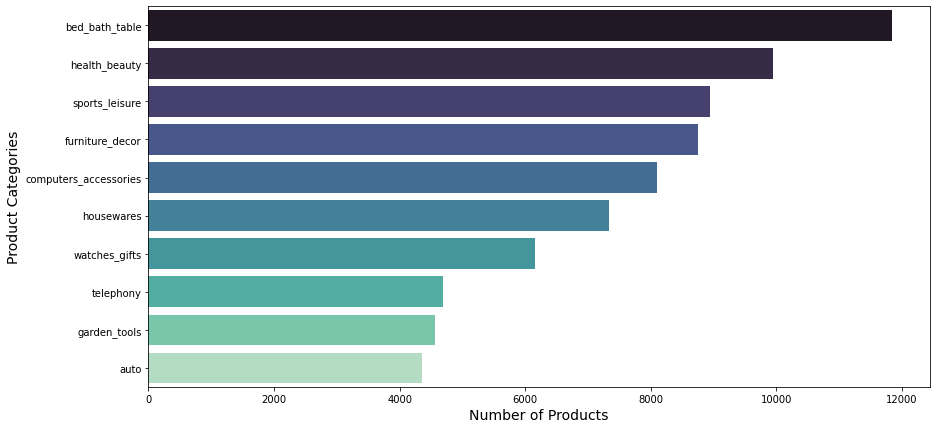

In [ ]:
popular_product_categories = pc_q.groupby('product_category_name_english')["product_id"].count()\
                                                                                        .reset_index()\
                                                                                        .sort_values("product_id", ascending = False)
plt.figure(figsize=(14, 7))
sns.barplot(x = "product_id", y = "product_category_name_english", data = popular_product_categories[:10], palette = 'mako')
plt.xlabel("Number of Products", fontsize = 14)
plt.ylabel("Product Categories", fontsize = 14)

Text(0.5, 0, 'Total Revenue (in millions)')

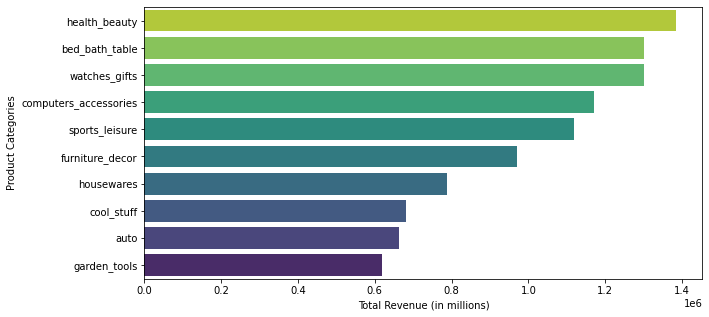

In [ ]:
revenue_product_categories = pc_q.groupby('product_category_name_english')["Price x Quantity"].sum().reset_index().sort_values("Price x Quantity", ascending = False)
revenue_product_categories
plt.figure(figsize = (10,5))
sns.barplot(y = "product_category_name_english", x="Price x Quantity", data=revenue_product_categories[:10], palette = 'viridis_r', orient = 'h')
plt.ylabel('Product Categories')
plt.xlabel('Total Revenue (in millions)')

In [ ]:
profitable_product_categories = pc_q.groupby('product_category_name_english')['profits'].sum().reset_index().sort_values('profits', ascending = False)
profitable_product_categories.head(10)

,product_category_name_english,profits
70,watches_gifts,1188269.26
43,health_beauty,1175624.46
7,bed_bath_table,1036820.34
15,computers_accessories,981494.28
65,sports_leisure,922460.71
39,furniture_decor,727714.80
49,housewares,595503.38
20,cool_stuff,587969.22
5,auto,558537.68
42,garden_tools,486859.17


In [ ]:
profitable_product_categories = pc_q.groupby('product_category_name_english')['profits'].sum().reset_index().sort_values('profits', ascending = False)
profitable_product_categories
freight_value_category = pc_q.groupby('product_category_name_english')['freight_value'].sum().reset_index().sort_values('freight_value', ascending = False)
freight_value_category

,product_category_name_english,freight_value
7,bed_bath_table,217807.32
43,health_beauty,187978.10
39,furniture_decor,181307.11
65,sports_leisure,174330.59
49,housewares,153848.83
...,...,...
46,home_comfort_2,375.97
3,arts_and_craftmanship,370.13
11,cds_dvds_musicals,224.99
29,fashion_childrens_clothes,95.51


In [ ]:
comparision_df = profitable_product_categories.merge(freight_value_category, on = "product_category_name_english")\
                                              .merge(revenue_product_categories, on = "product_category_name_english")
comparision_df2 = comparision_df[:10]
comparision_df2

,product_category_name_english,profits,freight_value,Price x Quantity
0,watches_gifts,1188269.26,103643.12,1300667.03
1,health_beauty,1175624.46,187978.10,1384414.30
2,bed_bath_table,1036820.34,217807.32,1301396.26
3,computers_accessories,981494.28,153483.43,1171994.41
4,sports_leisure,922460.71,174330.59,1119662.44
5,furniture_decor,727714.80,181307.11,969488.82
6,housewares,595503.38,153848.83,787625.80
7,cool_stuff,587969.22,87084.75,680649.00
8,auto,558537.68,95104.30,664122.79
9,garden_tools,486859.17,105236.25,617910.09


In [ ]:
total_loss_fr = comparision_df['Price x Quantity'].sum() - comparision_df['freight_value'].sum()
total_loss_fr

13455411.409999996

In [ ]:
revenue_product_categories1 = pc_q.groupby('product_category_name_english')["Price x Quantity"].sum().reset_index().sort_values("Price x Quantity", ascending = True)
revenue_product_categories1
profitable_product_categories1 = pc_q.groupby('product_category_name_english')['profits'].sum().reset_index().sort_values('profits', ascending = True)
profitable_product_categories1
freight_value_category1 = pc_q.groupby('product_category_name_english')['freight_value'].sum().reset_index().sort_values('freight_value', ascending = True)
freight_value_category1
comparision_dfb = profitable_product_categories1.merge(freight_value_category1, on = "product_category_name_english")\
                                               .merge(revenue_product_categories1, on = "product_category_name_english")
comparision_dfbb = comparision_dfb[:10]
comparision_dfbb

,product_category_name_english,profits,freight_value,Price x Quantity
0,security_and_services,242.07,41.22,283.29
1,home_comfort_2,369.08,375.97,811.87
2,fashion_childrens_clothes,474.34,95.51,569.85
3,cds_dvds_musicals,562.79,224.99,820.00
4,flowers,594.58,453.55,1092.44
5,diapers_and_hygiene,1329.92,573.68,2255.59
6,arts_and_craftmanship,1485.23,370.13,1875.90
7,fashion_sport,1733.45,592.23,2508.79
8,la_cuisine,1906.33,386.78,2330.98
9,fashio_female_clothing,2709.86,646.40,3524.17


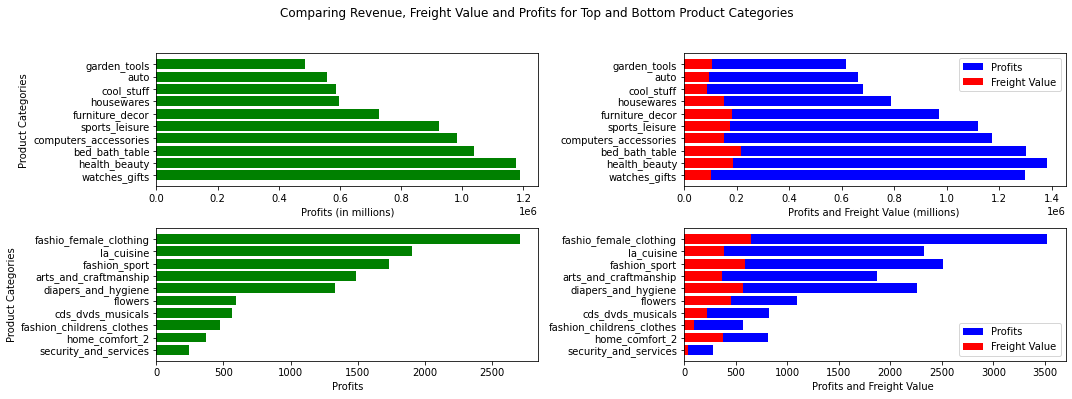

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,5))

ax[0][0].barh(comparision_df2['product_category_name_english'], comparision_df2['profits'], color = 'g')
ax[0][0].set_ylabel("Product Categories")
ax[0][0].set_xlabel("Profits (in millions)")


ax[0][1].barh(comparision_df2['product_category_name_english'], comparision_df2['Price x Quantity'], color = 'b')
ax[0][1].barh(comparision_df2['product_category_name_english'], comparision_df2['freight_value'], color = 'r')
ax[0][1].set_xlabel("Profits and Freight Value (millions) ")
legend_label = ["Profits", "Freight Value"]
ax[0][1].legend(legend_label)

ax[1][0].barh(comparision_dfbb['product_category_name_english'], comparision_dfbb['profits'], color = 'g')
ax[1][0].set_ylabel("Product Categories")
ax[1][0].set_xlabel("Profits")

ax[1][1].barh(comparision_dfbb['product_category_name_english'], comparision_dfbb['Price x Quantity'], color = 'b')
ax[1][1].barh(comparision_dfbb['product_category_name_english'], comparision_dfbb['freight_value'], color = 'r')
ax[1][1].set_xlabel("Profits and Freight Value ")
legend_label = ["Profits", "Freight Value"]
ax[1][1].legend(legend_label)

plt.suptitle("Comparing Revenue, Freight Value and Profits for Top and Bottom Product Categories", y=1.1)
fig.tight_layout()
plt.show()

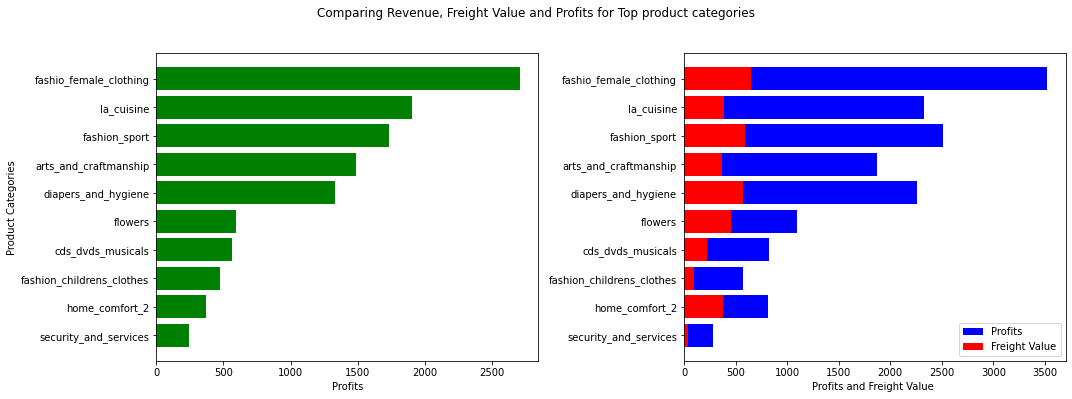

In [ ]:
#bottom_10_price = comparision_df2.groupby("product_category_name_english")["Profits"].reset_index().sort_values("pr")
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ax1.barh(comparision_dfbb['product_category_name_english'], comparision_dfbb['profits'], color = 'g')
ax1.set_ylabel("Product Categories")
ax1.set_xlabel("Profits (in millions)")


ax2.barh(comparision_dfbb['product_category_name_english'], comparision_dfbb['Price x Quantity'], color = 'b')
ax2.barh(comparision_dfbb['product_category_name_english'], comparision_dfbb['freight_value'], color = 'r')
ax2.set_xlabel("Profits and Freight Value ")
legend_label = ["Profits", "Freight Value"]
ax2.legend(legend_label)
plt.suptitle("Comparing Revenue, Freight Value and Profits for Top product categories", y=1.1)
fig.tight_layout()
plt.show()

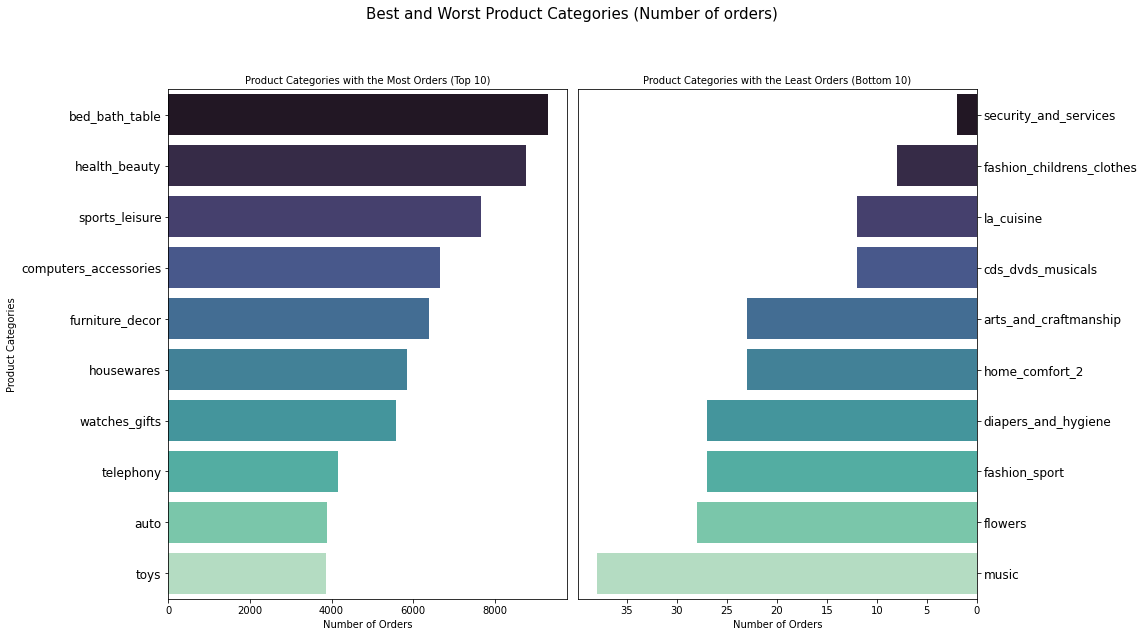

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
prod_top10 = pc_q.groupby("product_category_name_english")["order_id"].nunique().reset_index().sort_values('order_id', ascending=False)
sns.barplot(x = "order_id", y = "product_category_name_english", data = prod_top10[:10], palette = 'mako', ax = ax1)
ax1.set_xlabel("Number of Orders", fontsize = 10)
ax1.set_ylabel("Product Categories", fontsize = 10)
ax1.tick_params(axis = "y", labelsize = 12)
ax1.set_title("Product Categories with the Most Orders (Top 10)", fontsize = 10)

prod_bottom10 = pc_q.groupby("product_category_name_english")["order_id"].nunique().reset_index().sort_values("order_id", ascending = True)
sns.barplot(x = "order_id", y= "product_category_name_english", data = prod_bottom10[:10], palette = 'mako', ax = ax2)
ax2.set_xlabel("Number of Orders", fontsize = 10)
ax2.set_ylabel("")
ax2.yaxis.tick_right()
ax2.invert_xaxis()
ax2.tick_params(axis = "y", labelsize = 12)
ax2.set_title("Product Categories with the Least Orders (Bottom 10)", fontsize = 10)

plt.suptitle("Best and Worst Product Categories (Number of orders)", fontsize = 15, y=1.1)
plt.tight_layout()
plt.show()

In [ ]:
df['product_category_name'].

SyntaxError: invalid syntax (715143532.py, line 1)

## Data Science/ Machine Learning

### Customer Segmentation

#### RFM

In [ ]:
df.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'Quantity', 'seller_id',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'customer_id', 'order_status', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'Price x Quantity',
       'total_freight_value', 'profits', 'shipping_limit_date',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_creation_date',
       'review_answer_timestamp

In [ ]:
recency_df = df[["customer_unique_id", "order_purchase_timestamp", "order_id", "customer_state"]]
recency_df.rename(columns = {'order_purchase_timestamp': 'Latest_Purchase_Date'}, inplace = True)
recency_df = recency_df.groupby("customer_unique_id", as_index = False)["Latest_Purchase_Date"].max()
latest_date = recency_df["Latest_Purchase_Date"].max()
recency_df["Recency"] = recency_df["Latest_Purchase_Date"].apply(lambda x: (latest_date - x).days)
recency_df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_unique_id,Latest_Purchase_Date,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451
93392,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266
93393,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572
93394,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123


In [ ]:
frequency_df = df[["order_id", "customer_unique_id"]]
frequency_df.rename(columns = {"order_id" : "Frequency"}, inplace = True)
#frequency_df.Frequency.value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
frequency_df = frequency_df.groupby("customer_unique_id").agg({"Frequency": "nunique"}).reset_index()
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,1
93392,fffea47cd6d3cc0a88bd621562a9d061,1
93393,ffff371b4d645b6ecea244b27531430a,1
93394,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
monetary_df = df[["payment_value", "customer_unique_id"]]
monetary_df = monetary_df.groupby("customer_unique_id")["payment_value"].sum().reset_index().rename(columns = {"payment_value" : "Monetary"})

In [ ]:
RFM_df = monetary_df.merge(recency_df, on = "customer_unique_id")\
                    .merge(frequency_df, on = "customer_unique_id")

In [ ]:
RFM_df

,customer_unique_id,Monetary,Latest_Purchase_Date,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,2018-05-10 10:56:27,115,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,2018-05-07 11:11:27,118,1
2,0000f46a3911fa3c0805444483337064,86.22,2017-03-10 21:05:03,541,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,2017-10-12 20:29:41,325,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,2017-11-14 19:45:42,292,1
...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,2017-06-08 21:00:36,451,1
93392,fffea47cd6d3cc0a88bd621562a9d061,84.58,2017-12-10 20:07:56,266,1
93393,ffff371b4d645b6ecea244b27531430a,112.46,2017-02-07 15:49:16,572,1
93394,ffff5962728ec6157033ef9805bacc48,133.69,2018-05-02 15:17:41,123,1


In [ ]:
RFM_df.drop(columns = "Latest_Purchase_Date" , inplace = True)

In [ ]:
RFM_df

,customer_unique_id,Monetary,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,115,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,118,1
2,0000f46a3911fa3c0805444483337064,86.22,541,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,325,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,292,1
...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,451,1
93392,fffea47cd6d3cc0a88bd621562a9d061,84.58,266,1
93393,ffff371b4d645b6ecea244b27531430a,112.46,572,1
93394,ffff5962728ec6157033ef9805bacc48,133.69,123,1


##### Outlier Detection

In [ ]:
data = RFM_df[["Monetary", "Recency", "Frequency"]]
fig, ax = plt.subplots()
ax.boxplot(data)

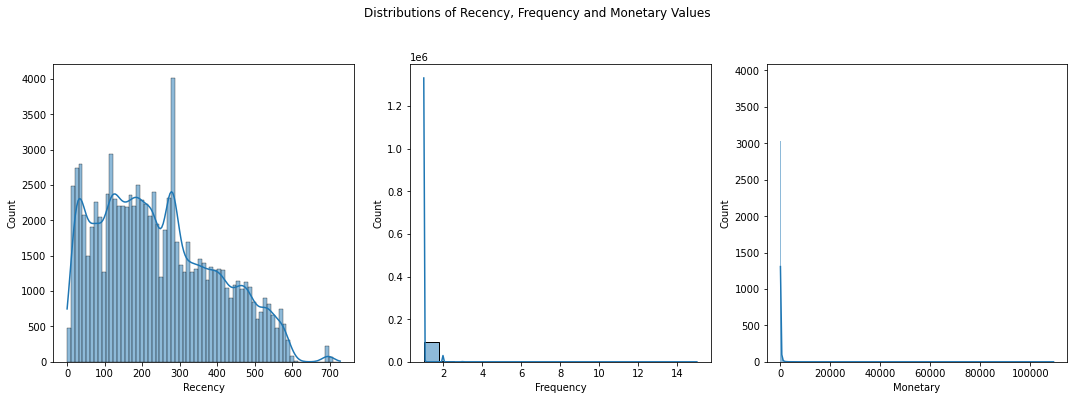

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

sns.histplot(RFM_df["Recency"], kde = True, ax = ax[0])
sns.histplot(RFM_df["Frequency"], kde = True, ax = ax[1])
sns.histplot(RFM_df['Monetary'], kde = True, ax = ax[2])
plt.suptitle('Distributions of Recency, Frequency and Monetary Values', y=1.1)

plt.tight_layout(pad = 1)
plt.show()

We can see that the distribution for Frequency and Monetary is very skewed. We want to normalize this before we apply the K-Means Algorithm.
Using the MinMaxScaler() and StandardScaler() are two scaling algorithms that are used.

Hence, we have to apply an nth root transformation on the data as well as a log transformation.

In [ ]:
RFM_nthroot = RFM_df.copy()
for feature in RFM_df.columns[1:]:
    RFM_nthroot[feature] = RFM_df[feature].apply(lambda x: np.power(x, (1/10)))

RFM_nthroot

,customer_unique_id,Monetary,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1.641339,1.607199,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.391365,1.611344,1.0
2,0000f46a3911fa3c0805444483337064,1.561568,1.876375,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1.458709,1.783152,1.0
4,0004aac84e0df4da2b147fca70cf8255,1.695986,1.764161,1.0
...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2.299566,1.842543,1.0
93392,fffea47cd6d3cc0a88bd621562a9d061,1.558572,1.747786,1.0
93393,ffff371b4d645b6ecea244b27531430a,1.603614,1.886860,1.0
93394,ffff5962728ec6157033ef9805bacc48,1.631586,1.618045,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFM_nthroot.drop('customer_unique_id', axis = 1))

RFM_scaleddf = pd.DataFrame(RFM_scaled, columns = RFM_nthroot.columns[1:])
RFM_scaleddf

,Monetary,Recency,Frequency
0,0.113659,-0.554181,-0.171914
1,-1.502419,-0.525483,-0.171914
2,-0.402060,1.309823,-0.171914
3,-1.067041,0.664264,-0.171914
4,0.466955,0.532757,-0.171914
...,...,...,...
93391,4.369084,1.075539,-0.171914
93392,-0.421429,0.419358,-0.171914
93393,-0.130232,1.382425,-0.171914
93394,0.050606,-0.479080,-0.171914


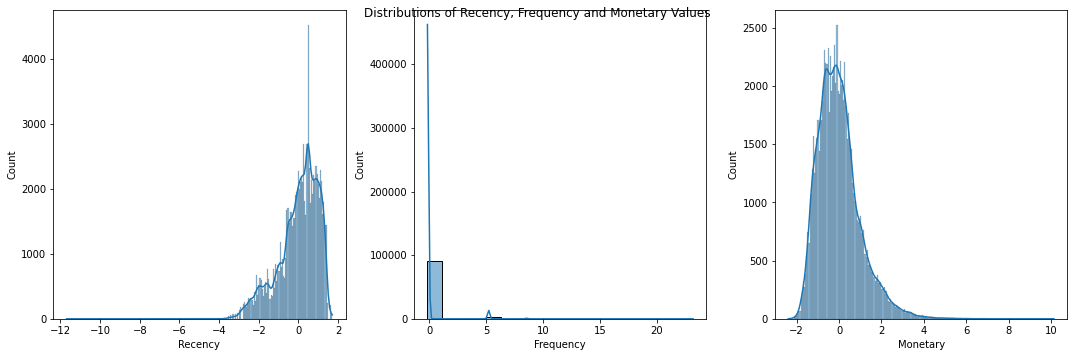

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

sns.histplot(RFM_scaleddf["Recency"], kde = True, ax = ax[0])
sns.histplot(RFM_scaleddf["Frequency"], kde = True, ax = ax[1])
sns.histplot(RFM_scaleddf['Monetary'], kde = True, ax = ax[2])
plt.suptitle('Distributions of Recency, Frequency and Monetary Values')

plt.tight_layout(pad = 1)
plt.show()

As you can see, we now have Recency, which is left skewed, monetary which is slightly right skewed.

We will now use the elbow method to evaluate the K-Means algorithm.

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range (1,10)
for k in K:
    KMeans_model = KMeans(n_clusters=k)
    KMeans_model.fit(RFM_scaleddf)
    distortions.append(KMeans_model.inertia_)

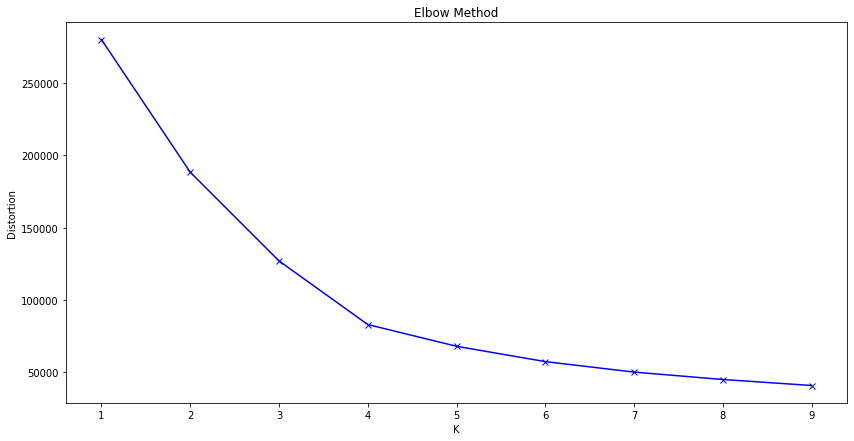

In [ ]:
plt.figure(figsize = (14,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

As we can see, the elbow method does not give a clear optimal k, so we will try using the silhouette score instead.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
K_clusters = [2,3,4,5,6,7,8,9,10]
silhouette_scores = []

for K in K_clusters:
    initialised_clusters = KMeans(n_clusters = K, max_iter = 30, random_state = 10)
    initialised_clusters.fit(RFM_scaleddf)
    cluster_labels = initialised_clusters.labels_
    score = silhouette_score(RFM_scaleddf, cluster_labels, random_state = 10)
    silhouette_scores.append(score)

KeyboardInterrupt: ignored

In [ ]:
plt.plot(K_clusters, silhouette_scores)
plt.title("Cluster Scores", fontsize = 15)
plt.xlabel("Number of Clusters", fontsize = 12)
plt.ylabel("Silhouette Score", fontsize = 12)
plt.show()

We can see from the plot that the ideal number of clusters is 5. Hence we build the final model with 5 clusters.

In [ ]:
Final = KMeans(n_clusters = 5, random state = 1)